## Reading data from spam.csv file

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
3722,ham,We left already we at orchard now.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4233,ham,Now only i reached home. . . I am very tired n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2547,spam,"Text82228>> Get more ringtones, logos and game...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2445,ham,The guy (kadeem) hasn't been selling since the...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5438,ham,"\What are youdoing later? Sar xxx\""""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(5572, 38)

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   v1           5572 non-null   object
 1   v2           5571 non-null   object
 2   Unnamed: 2   255 non-null    object
 3   Unnamed: 3   167 non-null    object
 4   Unnamed: 4   32 non-null     object
 5   Unnamed: 5   23 non-null     object
 6   Unnamed: 6   10 non-null     object
 7   Unnamed: 7   10 non-null     object
 8   Unnamed: 8   5 non-null      object
 9   Unnamed: 9   4 non-null      object
 10  Unnamed: 10  4 non-null      object
 11  Unnamed: 11  1 non-null      object
 12  Unnamed: 12  1 non-null      object
 13  Unnamed: 13  1 non-null      object
 14  Unnamed: 14  1 non-null      object
 15  Unnamed: 15  1 non-null      object
 16  Unnamed: 16  1 non-null      object
 17  Unnamed: 17  1 non-null      object
 18  Unnamed: 18  1 non-null      object
 19  Unnamed: 19  1 non-null    

In [6]:
# select only the columns which are not null majority of the times
cols = ['v1', 'v2']
df = pd.DataFrame(df, columns=cols)

In [7]:
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5571 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


,v1,v2
4934,ham,"Hey babe, how's it going ? Did you ever figure..."
1534,ham,Remember on that day..
4725,ham,Jason says it's cool if we pick some up from h...
2987,ham,Do you still have the grinder?
2024,ham,U having lunch alone? I now so bored...


In [8]:
# Renaming to relevant column names
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# binary encoding target field : 
# 1 -> spam, 
# 0 -> ham
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# check for null entries
print(df.isnull().sum())

target    0
text      1
dtype: int64


In [11]:
# removing null entries
df.dropna(inplace=True)

In [12]:
# check for duplicate entries
print(df.duplicated().sum())

408


In [13]:
# removing duplicate values
df.drop_duplicates(keep='first', inplace=True)

In [14]:
print(df.duplicated().sum())
print(df.isnull().sum())

0
target    0
text      0
dtype: int64


## 2. Exploratory Data Analysis (EDA)

In [15]:
pieData = df['target'].value_counts()
print(pieData)

0    4510
1     653
Name: target, dtype: int64


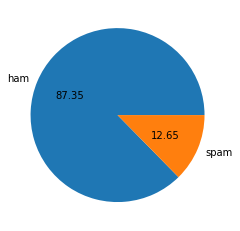

In [16]:
import matplotlib.pyplot as plt
plt.pie(pieData, labels=['ham', 'spam'], autopct='%0.2f')
plt.show()
# data is imbalanced, ham are more than spam

In [17]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/karthikjp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
# ham 
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4510.000000,4510.000000,4510.000000
mean,68.688248,16.541685,1.789800
std,54.838171,12.836274,1.245149
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,51.000000,13.000000,1.000000
75%,88.000000,21.000000,2.000000
max,910.000000,196.000000,16.000000


In [23]:
# spam 
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.437979,27.669219,2.977029
std,30.154681,7.030450,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [24]:
import seaborn as sns

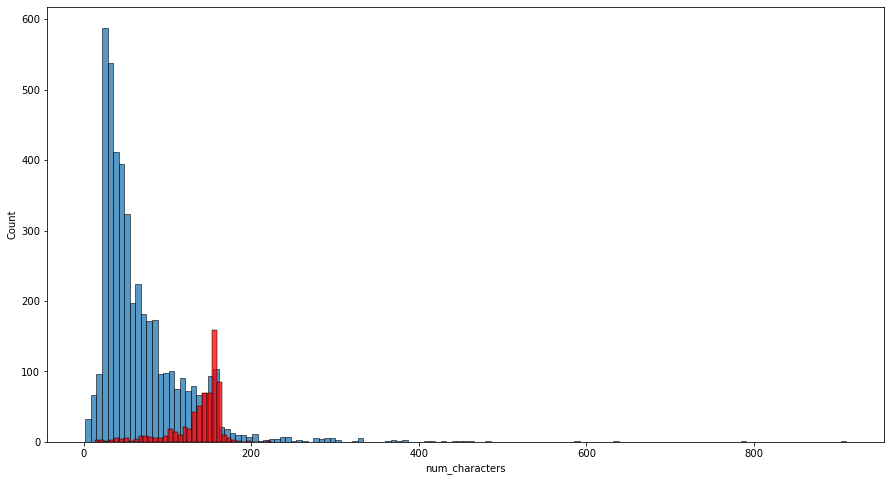

In [25]:
# Histogram on num_characters
# blue -> ham, red -> spam
plt.figure(figsize=(15, 8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')
plt.show()

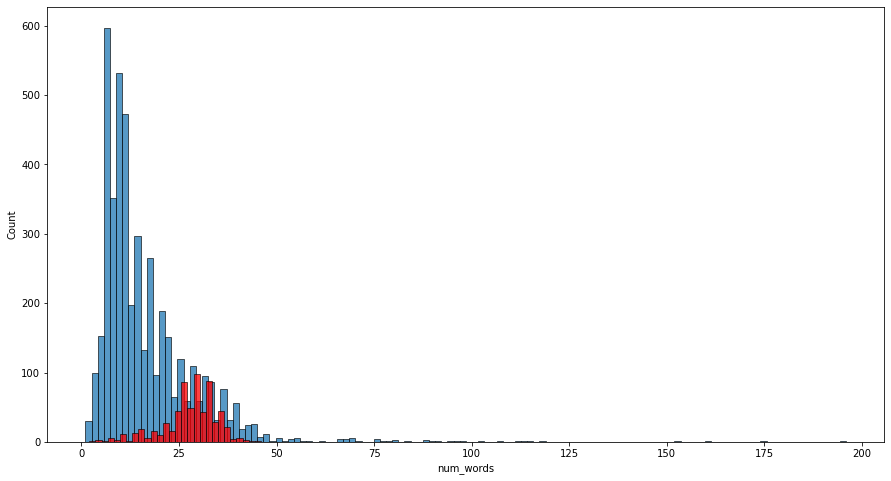

In [26]:
# Histogram on num_words
# blue -> ham, red -> spam
plt.figure(figsize=(15, 8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')
plt.show()

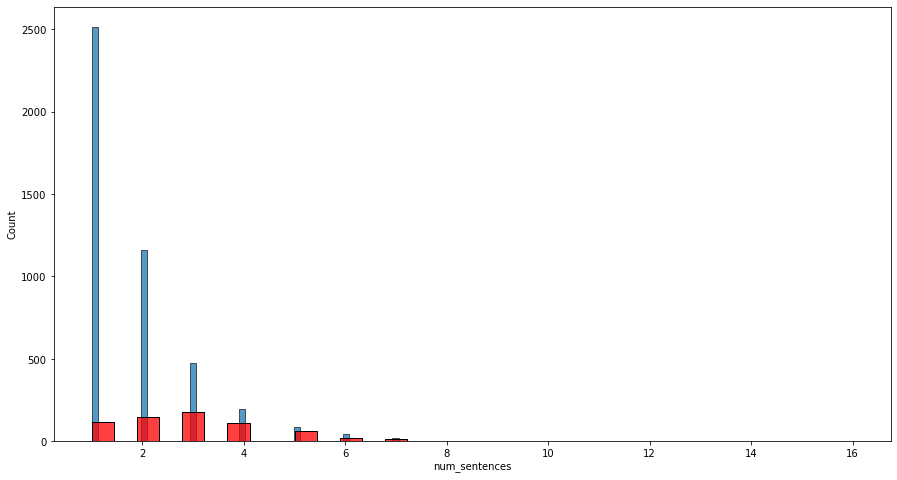

In [27]:
# Histogram on num_sentences
# blue -> ham, red -> spam
plt.figure(figsize=(15, 8))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')
plt.show()

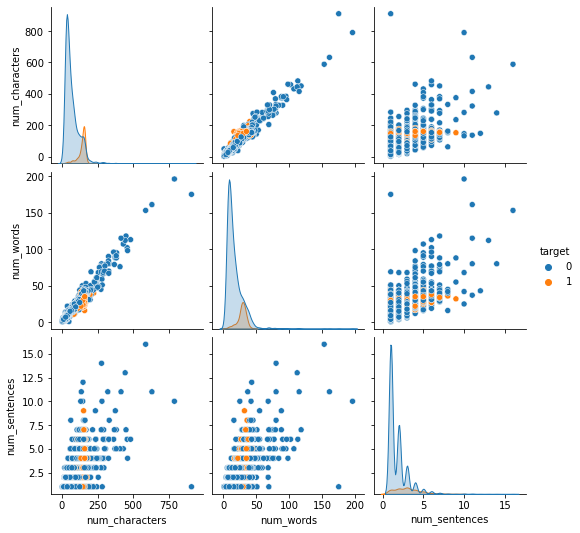

In [28]:
sns.pairplot(df, hue='target')
plt.show()

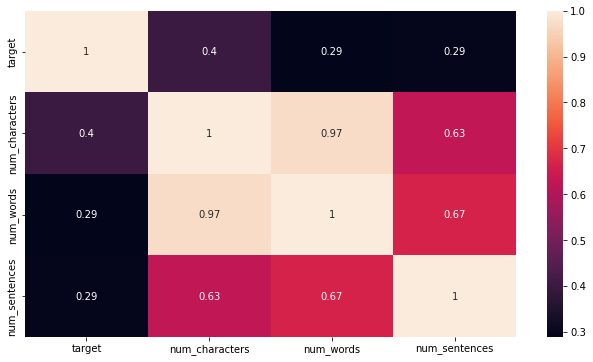

In [29]:
plt.figure(figsize=(11, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()
# As #words and #sentences have good corelation with #characters, retain num_characters column for further analysis

## 3. Data Preprocessing

<ul>
    <li>convert to lowecase</li>
    <li>tokenization (breaking into words)</li>
    <li>removing special characters</li>
    <li>removing stop words and punctuations</li>
    <li>stemming (lemmatization)</li>
</ul>

In [30]:
# stop words and puntuation marks
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/karthikjp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
# stemming library
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [33]:
def perform_data_pre_processing(text) : 
    
    text = text.lower() # converto lower case
    text = nltk.word_tokenize(text) # tokenization
    
    # retaining alpha numeric words
    y = []
    for word in text : 
        if word.isalnum() :
            y.append(word)
  
    text.clear()
    text = y[:] # cloning y into text
    y.clear()
        
    # removing stop words and punctuations
    for word in text : 
        if word not in stopwords.words('english') and word not in string.punctuation : 
            y.append(word)
    
    text.clear()
    text = y[:] # cloning y into text
    y.clear()
    
    #stemming
    for word in text : 
        y.append(ps.stem(word))
        
    text = " ".join(y)
    
    return text

In [34]:
perform_data_pre_processing('Hello there! You will now be amongst the first to hear the details of our special events hosted at GoLive. Reply STOP to unsubscribe')

'hello amongst first hear detail special event host goliv repli stop unsubscrib'

In [35]:
# perfoming dpp on text column
df['transformed_text'] = df['text'].apply(perform_data_pre_processing)
df.sample(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
2598,0,Okie... Thanx...,16,4,1,oki thanx
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
844,0,K.k:)when are you going?,24,8,1,go
1843,0,Super da:)good replacement for murali,37,8,1,super da good replac murali
1015,0,"Dear,regret i cudnt pick call.drove down frm c...",124,25,1,dear regret cudnt pick frm ctla cochin mobil c...


In [36]:
# most frequent words in spam messages

spam_corpus = [] # list of words in all spam messages

for text in df[df['target'] == 1]['transformed_text'].tolist() : 
    for word in text.split() : 
        spam_corpus.append(word)
        
print(len(spam_corpus))

9938


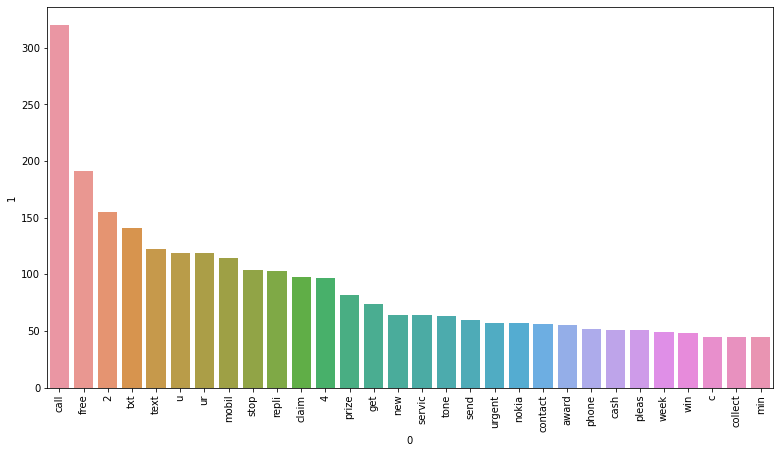

In [37]:
from collections import Counter

frequent_words = pd.DataFrame(Counter(spam_corpus).most_common(30))

plt.figure(figsize=(13, 7))

sns.barplot(x = frequent_words[0], y = frequent_words[1])
plt.xticks(rotation='vertical')

plt.show()

In [38]:
# most frequent words in ham messages

ham_corpus = [] # list of words in all ham messages

for text in df[df['target'] == 0]['transformed_text'].tolist() : 
    for word in text.split() : 
        ham_corpus.append(word)

print(len(ham_corpus))

34290


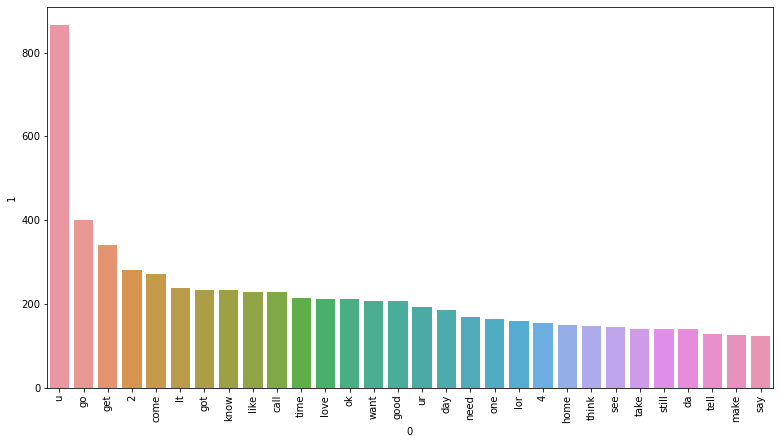

In [39]:
from collections import Counter
frequent_words = pd.DataFrame(Counter(ham_corpus).most_common(30))

plt.figure(figsize=(13, 7))

sns.barplot(x = frequent_words[0], y = frequent_words[1])
plt.xticks(rotation='vertical')

plt.show()

## 4. Model Building

In [40]:
# for vectoring the input text into numerical (using count vectorizer)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [41]:
X = cv.fit_transform(df['text']).toarray() # converting sparse -> dense
print(X.shape)
print(X)

(5163, 8483)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [42]:
# output 
y = df['target'].values
print(y)

[0 0 1 ... 0 0 0]


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [45]:
# naive bayes ml algorithm
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [46]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [47]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8915779283639884
0.5471698113207547
[[805  96]
 [ 16 116]]


In [48]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.9825750242013552
0.9130434782608695
[[889  12]
 [  6 126]]


In [49]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.9757986447241046
0.9734513274336283
[[898   3]
 [ 22 110]]


In [50]:
# for vectoring the input text into numerical (using count vectorizer)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [51]:
X = tfidf.fit_transform(df['text']).toarray() # converting sparse -> dense
print(X.shape)
print(X)

(5163, 3000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [53]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8780251694094869
0.5135135135135135
[[793 108]
 [ 18 114]]


In [54]:
# precision is the most in case of multinomial naive bayes and Tfidfvectorizer and accuracy is also good enough
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.9757986447241046
1.0
[[901   0]
 [ 25 107]]


In [55]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.9864472410454985
0.9916666666666667
[[900   1]
 [ 13 119]]


In [57]:
import pickle
pickle.dump(mnb, open('model.pkl', 'wb'))
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(perform_data_pre_processing, open('text_processor.pkl', 'wb'))